In [1]:
#DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
DATA_PATH ='D:/amityu/backoffice_data/'
import matplotlib.pyplot as plt
from analysis import autocorrelation_and_structure_factor_IK_and_YA as ac
from utils import  graph_utils as gu
from matplotlib.ticker import FormatStrFormatter
from matplotlib.animation import FuncAnimation
import pandas as pd
from tqdm.notebook import trange, tqdm
import numpy as np
import json
import importlib
from numpy.fft import fft2, fftshift,ifftshift

mu_symbol = "\u03BC"

In [2]:
movie_list = ['Control', '140721', '150721', '100621', '130721_CCA60_RAW','280523 AM100 568_1', 'control_1_050721','cca120', 'cca120_am200']

for i, m in enumerate(movie_list):
    print(i,m)


0 Control
1 140721
2 150721
3 100621
4 130721_CCA60_RAW
5 280523 AM100 568_1
6 control_1_050721
7 cca120
8 cca120_am200


In [3]:
k = 4
movie= movie_list[k]
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'
ADD_DATA_PATH = 'C:/Users/amityu/DataspellProjects/gel_sheets/add_data/%s/'%movie
with open(MOVIE_PATH + 'ex_data.json', 'r') as f:
    ex_data = json.load(f)
print('movie {}'.format(movie))

movie 130721_CCA60_RAW


In [62]:
surface = np.load(MOVIE_PATH + 'np/height.npy')
time_df = pd.read_csv(ADD_DATA_PATH + '%s_time.csv'%movie)

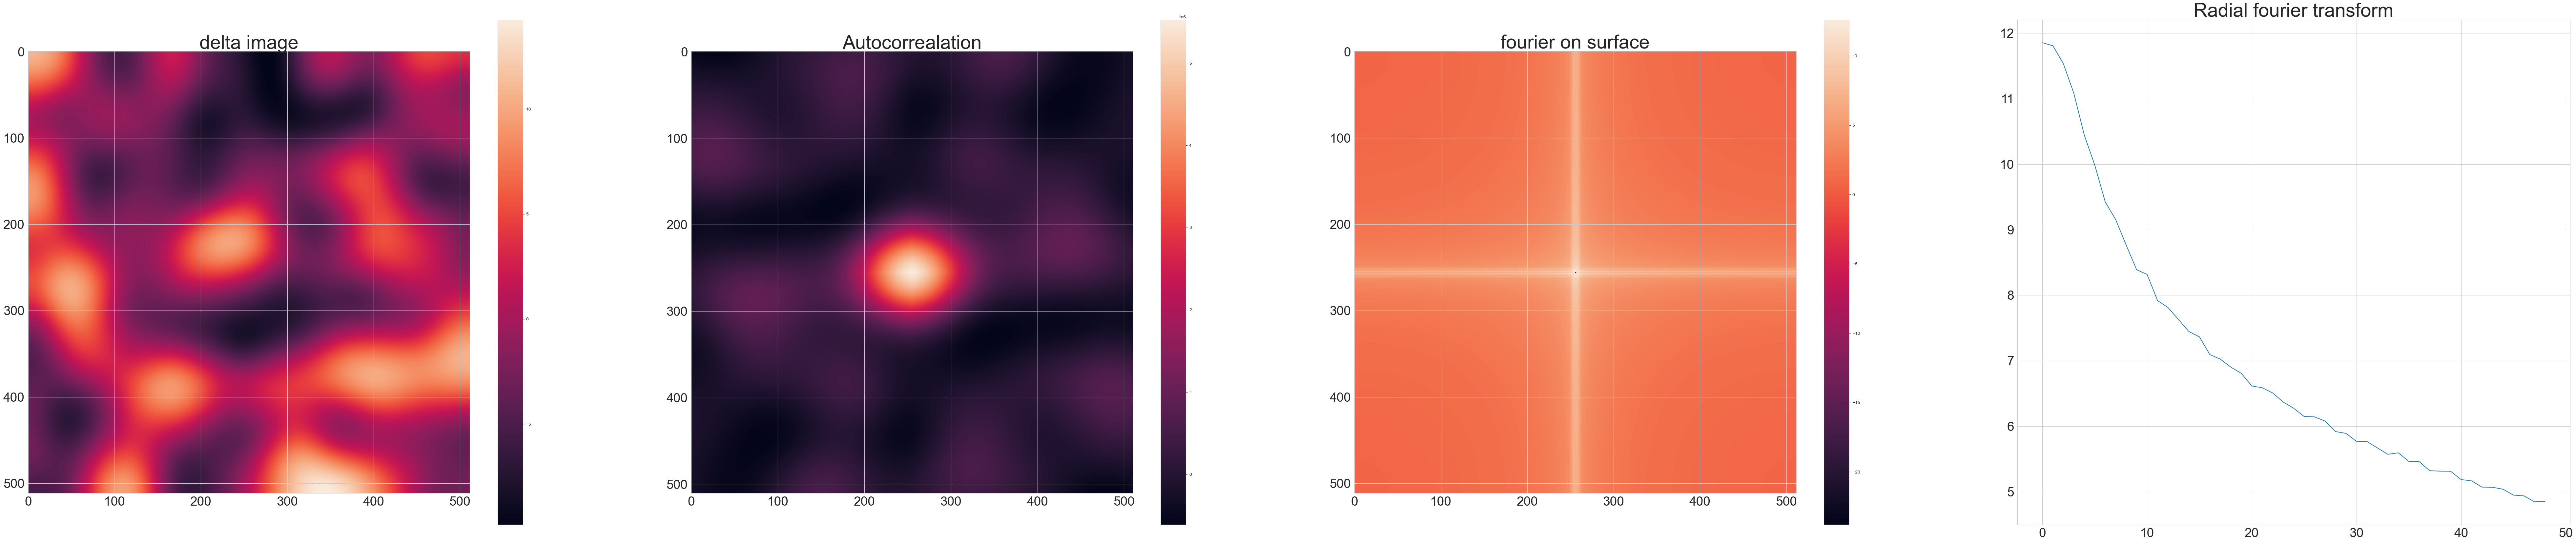

In [120]:

M,N = surface.shape[1:]
t = 18
fig, axes = plt.subplots(1,4, figsize = (100,20))
surface[t] = gu.interpolate_smooth_restore_2d(surface[t], sigma =5)
img = axes[0].imshow(surface[t] -np.nanmean(surface[t]))
axes[0].set_title("delta image", fontsize = 42)
plt.colorbar(img, ax = axes[0])

h_autocorr,xlag,ylag = ac.spatial_autocorr(surface[t], x = np.arange(surface.shape[2])* ex_data['delta x'], y = np.arange(surface.shape[1])* ex_data['delta y'])
h_autocorr = h_autocorr[M//2 : -M//2, N//2:-N//2]
img = axes[1].imshow(h_autocorr)
axes[1].set_title('Autocorrealation', fontsize = 42)
plt.colorbar(img, ax = axes[1])
#F = np.log(np.abs(fftshift(fft2(h_autocorr))))
F = np.log(np.abs(fftshift(fft2(surface[t] -np.nanmean(surface[t])))))


img = axes[2].imshow(F)
axes[2].set_title('fourier on surface', fontsize = 42)
plt.colorbar(img, ax = axes[2])
radial= gu.xy_matrix_to_r(F,256,256)[:M//2]
axes[3].plot(radial[1:50], label = str(t))
axes[3].set_title('Radial fourier transform', fontsize = 42)

for i in range(4):
    axes[i].tick_params(axis='both', which='major', labelsize=28) # Increase tick labels

#plt.legend()
plt.show()
   
    

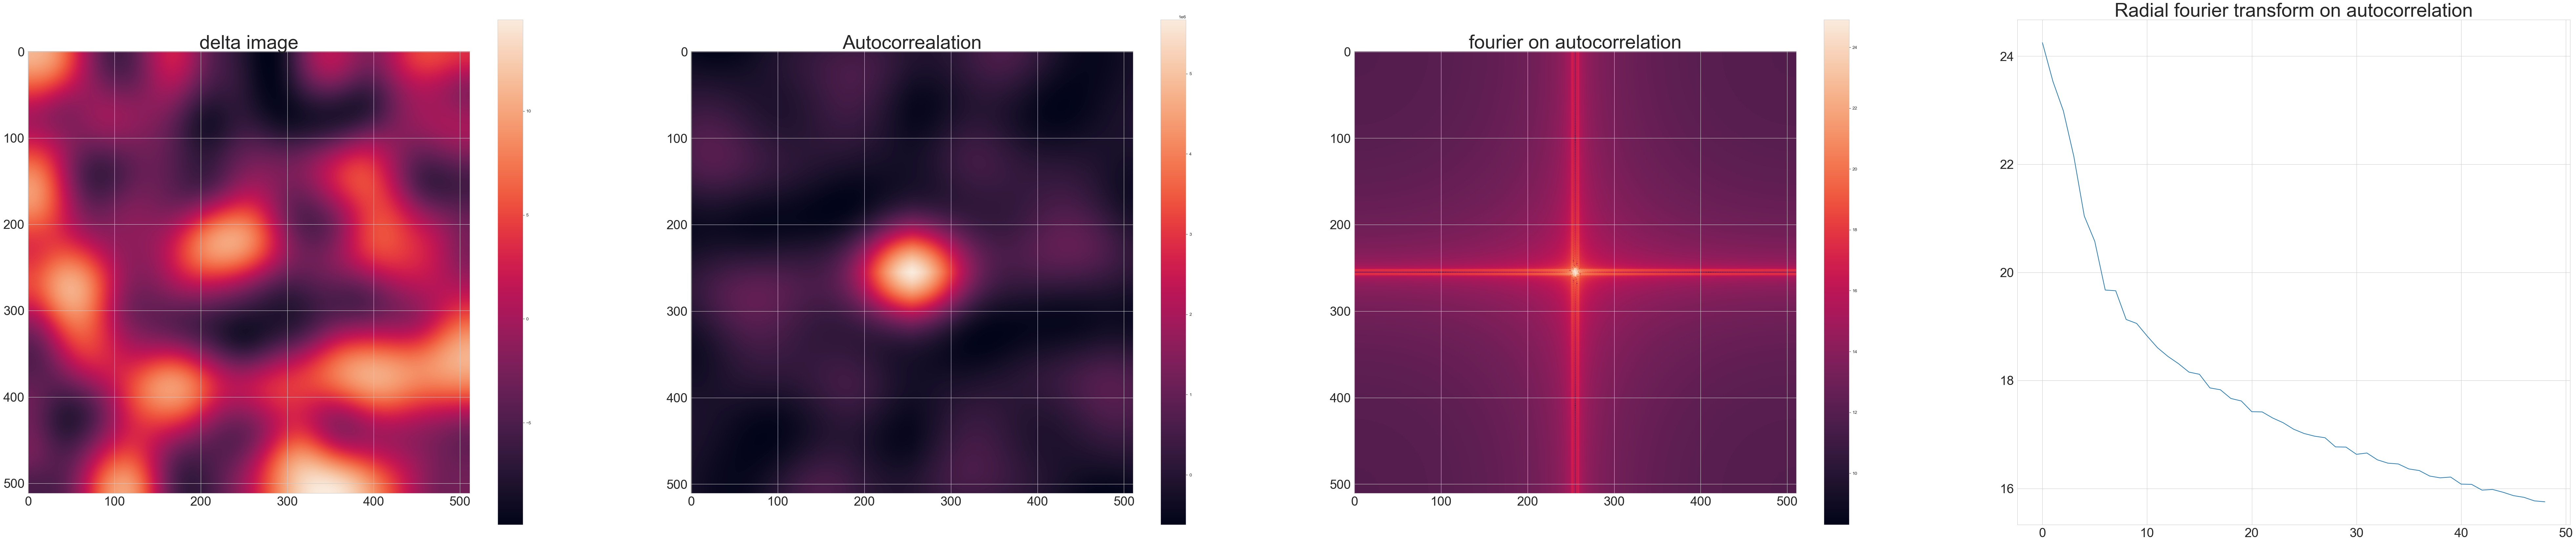

In [119]:

M,N = surface.shape[1:]
t = 18
fig, axes = plt.subplots(1,4, figsize = (100,20))

surface[t] = gu.interpolate_smooth_restore_2d(surface[t], sigma =5)
img = axes[0].imshow(surface[t] -np.nanmean(surface[t]))
axes[0].set_title("delta image", fontsize = 42)
plt.colorbar(img, ax = axes[0])

h_autocorr,xlag,ylag = ac.spatial_autocorr(surface[t], x = np.arange(surface.shape[2])* ex_data['delta x'], y = np.arange(surface.shape[1])* ex_data['delta y'])
h_autocorr = h_autocorr[M//2 : -M//2, N//2:-N//2]
img = axes[1].imshow(h_autocorr)
axes[1].set_title('Autocorrealation', fontsize = 42)
plt.colorbar(img, ax = axes[1])
#F = np.log(np.abs(fftshift(fft2(h_autocorr))))
F = np.log(np.abs(fftshift(fft2(h_autocorr))))


img = axes[2].imshow(F)
axes[2].set_title('fourier on autocorrelation', fontsize = 42)
plt.colorbar(img, ax = axes[2])
radial= gu.xy_matrix_to_r(F,256,256)[:M//2]
axes[3].plot(radial[1:], label = str(t))
axes[3].set_title('Radial fourier transform on autocorrelation', fontsize = 42)

for i in range(4):
    axes[i].tick_params(axis='both', which='major', labelsize=28) # Increase tick labels

#plt.legend()
plt.show()



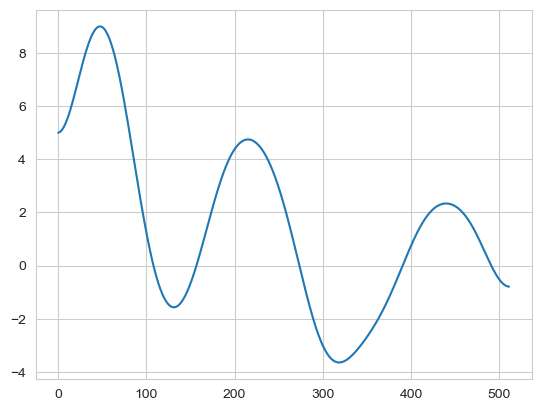

In [130]:
img = surface[t] -np.nanmean(surface[t])
plt.plot(img[256,:])
plt.show()

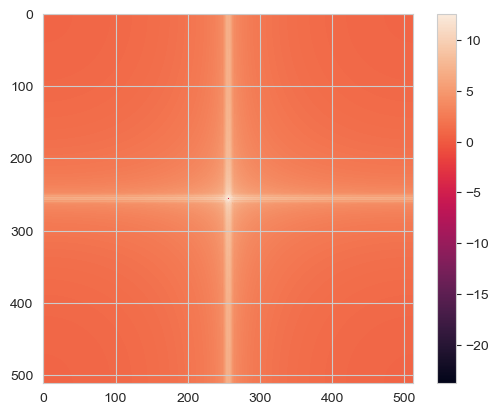

In [131]:
F = np.log(np.abs(fftshift(fft2(img))))


plt.imshow(F)
plt.colorbar()


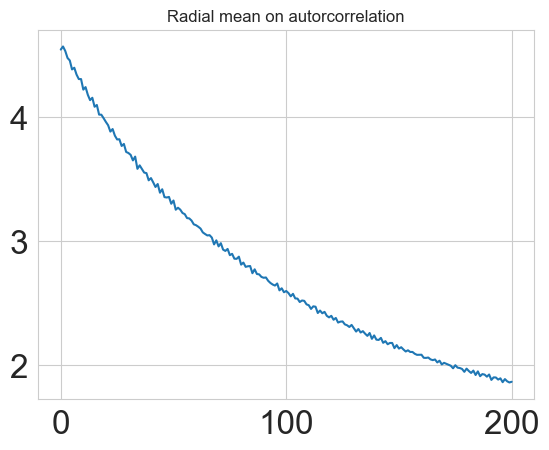

In [122]:
radial_auto = gu.xy_matrix_to_r(h_autocorr, 256,256)
plt.plot(radial[55:500])
plt.title('Radial mean on autorcorrelation')
plt.tick_params(axis='both', which='major', labelsize=24) # Increase tick labels

plt.show()

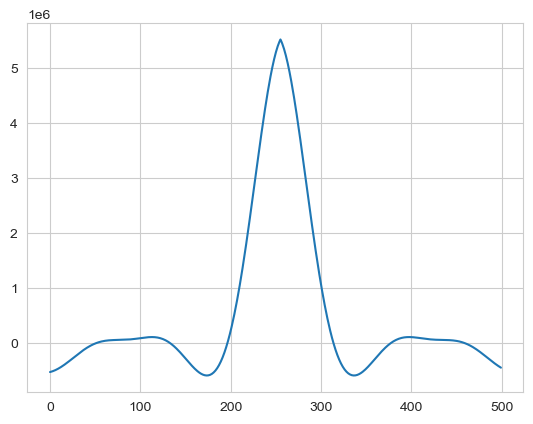

In [125]:
plt.plot(h_autocorr[range(500),range(500)])
plt.show()

In [5]:
t = 19
surface[t] = gu.interpolate_smooth_restore_2d(surface[t], sigma=5)
h_autocorr,xlag,ylag = ac.spatial_autocorr(gu.interpolate_smooth_restore_2d(surface[t], sigma=3), x = np.arange(surface.shape[2])* ex_data['delta x'], y = np.arange(surface.shape[1])* ex_data['delta y'])

In [129]:
import importlib
importlib.reload(gu)


SyntaxError: invalid syntax (graph_utils.py, line 70)

In [7]:
SSF, kx, ky = ac.static_structure_factor(h_autocorr,xlag)

In [8]:

d,  kr = ac.static_structure_factor_radial(SSF, kx, ky)

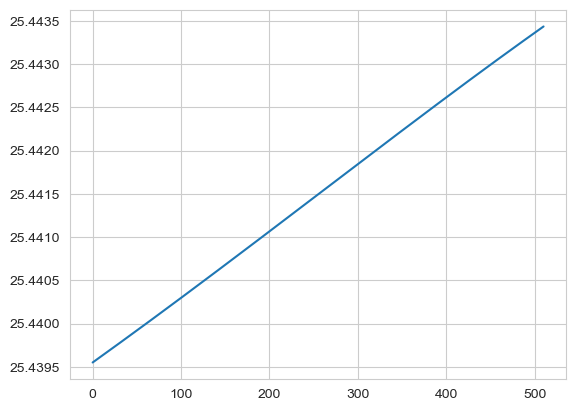

In [10]:
plt.plot(np.log(d))
plt.show()

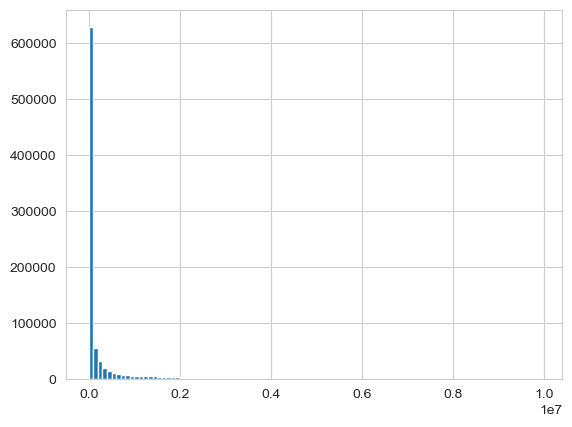

In [26]:
plt.hist(SSF.flatten(), bins= np.arange(0,1e7,1e5))
plt.show()

In [44]:
mid = 512
gap = 20


data = np.zeros((surface.shape[0], gap*2, gap*2)) 
for t in trange(len(surface)):
    h_autocorr,xlag,ylag = ac.spatial_autocorr(gu.interpolate_smooth_restore_2d(surface[int(t)], sigma=3), x = np.arange(surface.shape[2])* ex_data['delta x'], y = np.arange(surface.shape[1])* ex_data['delta y'])
    SSF, kx, ky = ac.static_structure_factor(h_autocorr,xlag)
    data[t] = SSF[mid-gap:mid+gap,mid-gap:mid+gap]

  0%|          | 0/62 [00:00<?, ?it/s]

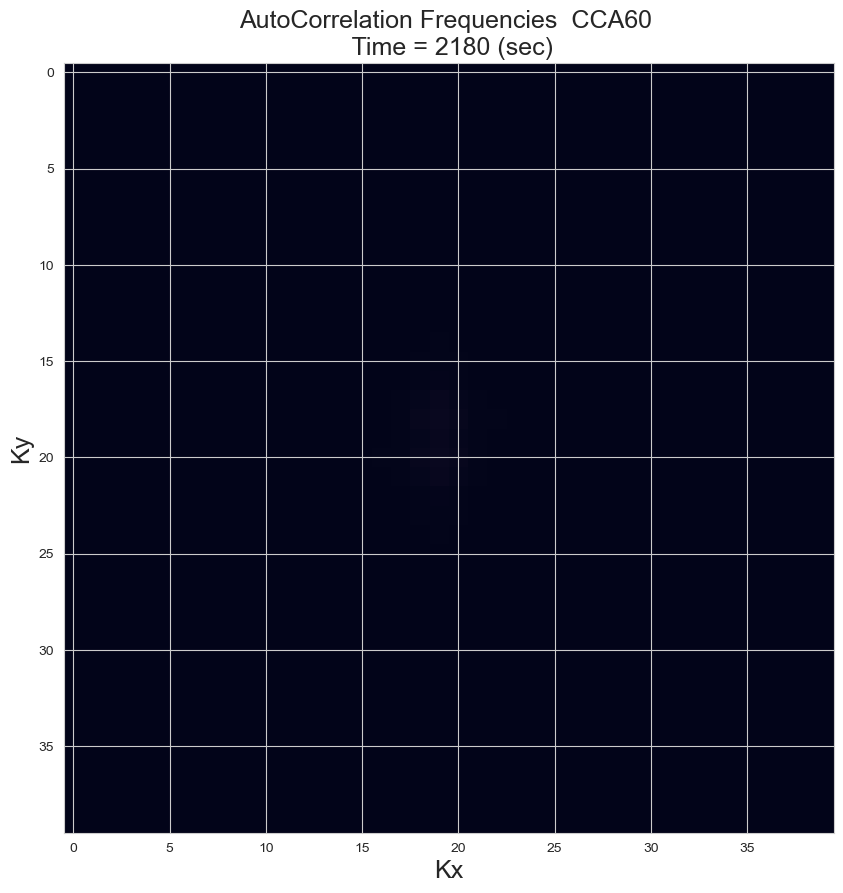

In [58]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
v_min = np.nanmin(data)
v_max = np.nanpercentile(data, 99.8)
#y_min = np.log(np.nanmin(data))
#y_max= np.log(np.nanmax(data))
time_range= np.arange(0, len(surface),0.25)
#time_range = np.arange(10, 20,0.25)
def update(time):
    if time== int(time):
        t = int(time)
        ax.clear()
       
        frame_time = int(time_df.loc[time_df['frame'] == t, 'time (sec)'].values[0])
        ax.set_title('AutoCorrelation Frequencies  %s \n Time = %s (sec)'%(ex_data['name'], frame_time), fontsize = 18)
        ax.imshow(data[t], vmin=v_min, vmax=v_max)
        #ax.set_ylim(y_min , y_max )


        ax.set_xlabel('Kx', fontsize = 18)
        ax.set_ylabel('Ky', fontsize = 18)


animation = FuncAnimation(fig, update, frames=time_range, repeat=False, interval=1000)  # 1 second per frame

# Save the animation as an MPEG file
animation.save(GRAPH_PATH + 'analysis/autocorr/surface_freq_xy%s.avi'%movie, writer='ffmpeg', extra_args=['-crf', '8'], codec = 'h264', fps=4)

# Display the animation (optional)
plt.show()


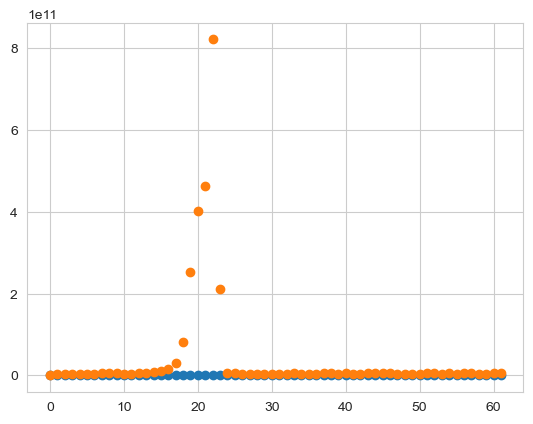

In [54]:
vmins = np.nanmin(data, axis=(1,2))
vmaxs = np.nanmax(data, axis=(1,2))
plt.scatter(range(len(surface)), vmins)
plt.scatter(range(len(surface)),vmaxs)
plt.show()


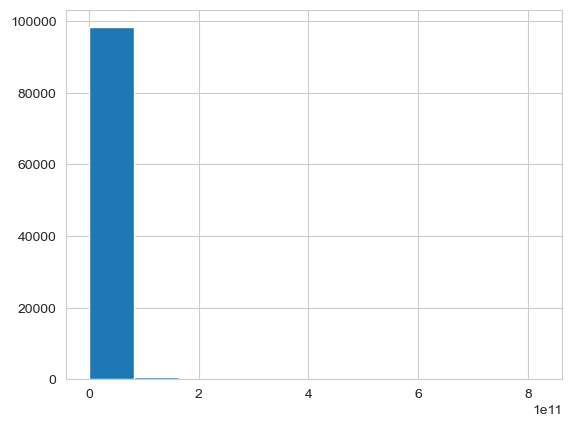

In [47]:
plt.hist(data.flatten())
plt.show()

In [27]:
len([SSF[SSF ==0 ]])

1

# Radial autocorrelation frequency animation


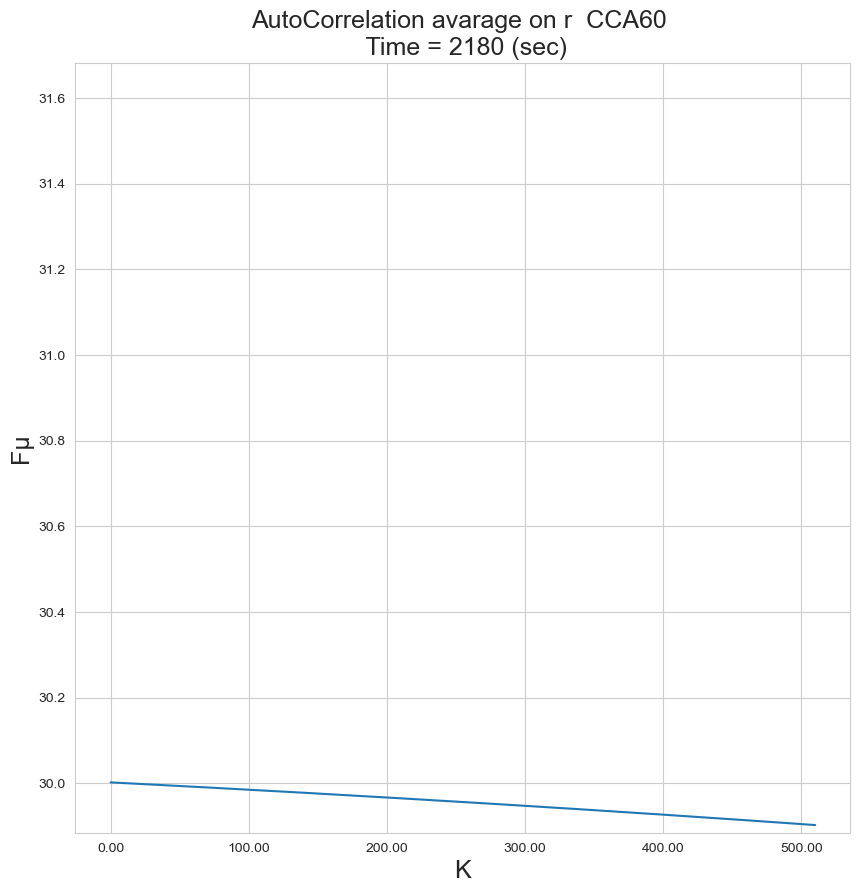

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
y_min = np.log(np.nanmin(data))
y_max= np.log(np.nanmax(data))
time_range= np.arange(0, len(surface),0.25)
#time_range = np.arange(10, 20,0.25)
formatter = FormatStrFormatter('%.2f')  # Two decimal places
def update(t):
    if t== int(t):
        ax.clear()
        frame_time = int(time_df.loc[time_df['frame'] == t, 'time (sec)'].values[0])
        ax.set_title('AutoCorrelation avarage on r  %s \n Time = %s (sec)'%(ex_data['name'], frame_time), fontsize = 18)

        ax.xaxis.set_major_formatter(formatter)

        ax.xaxis.set_major_formatter(formatter)

        ax.plot(range(data.shape[1]),np.log(data[int(t)]))
        ax.set_ylim(y_min , y_max )
     
        
        ax.set_xlabel('K', fontsize = 18)
        ax.set_ylabel('F\u03BC', fontsize = 18)
        




animation = FuncAnimation(fig, update, frames=time_range, repeat=False, interval=1000)  # 1 second per frame

# Save the animation as an MPEG file
animation.save(GRAPH_PATH + 'analysis/autocorr/surface_freq_%s.avi'%movie, writer='ffmpeg', extra_args=['-crf', '8'], codec = 'h264', fps=4)

# Display the animation (optional)
plt.show()


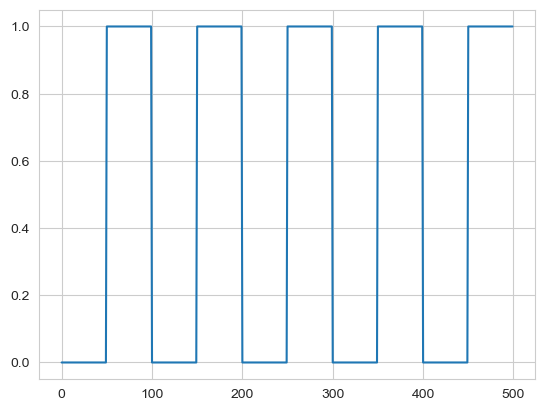

In [6]:
data = np.ones(500)
for i in range(0,500,100):
    data[i:i+50] = 0
plt.plot(data)
plt.show()

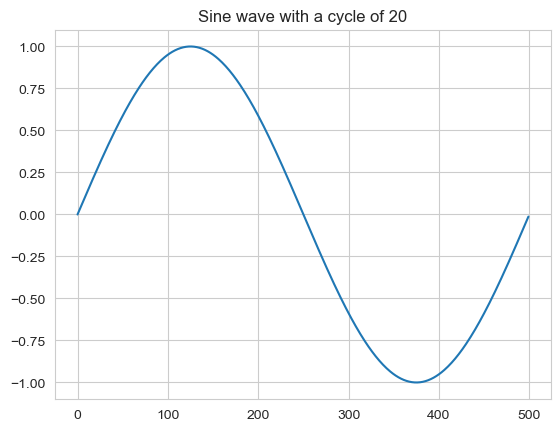

In [60]:
T =   # The period
f = 1.0 / T  # The frequency

t = np.linspace(0, T, 500, endpoint=False)  # 500 points between 0 and 20
y = np.sin(2 * np.pi * f * t)  # The sinusoidal function

plt.plot(y)
plt.title('Sine wave with a cycle of 20')
plt.grid(True)
plt.show()

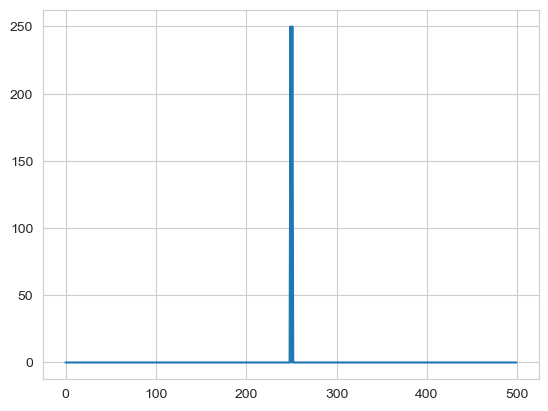

In [57]:
from numpy.fft import fft2, fftshift,ifftshift

from scipy.signal import fftconvolve
f_data = np.abs(np.fft.fft(y))
plt.plot(fftshift(f_data))
plt.show()

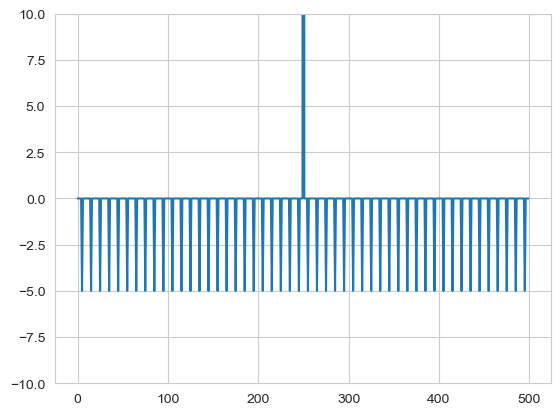

In [19]:
plt.plot(fftshift(f_data))
plt.ylim((-10,10))
plt.show()